## **Akses Google Drive**

In [ ]:
import os
print(os.listdir('/content/drive/My Drive/rockpaperscissors.zip'))

['rockpaperscissors']


In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
print(os.listdir('/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images'))

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']


In [ ]:
path = Path('/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images')
print(path)
print(path.ls())

/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images
[PosixPath('/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images/paper'), PosixPath('/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images/rock'), PosixPath('/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images/scissors'), PosixPath('/content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')]


In [ ]:
data = ImageDataBunch.from_folder(
    path=path,
    train=".",
    valid_pct=0.1,
    size=224,
    ds_tfms=get_transforms()
)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1970 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
paper,paper,paper,paper,paper
Path: /content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images;

Valid: LabelList (218 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rock,scissors,rock,paper,rock
Path: /content/drive/My Drive/rockpaperscissors.zip/rockpaperscissors/rps-cv-images;

Test: None

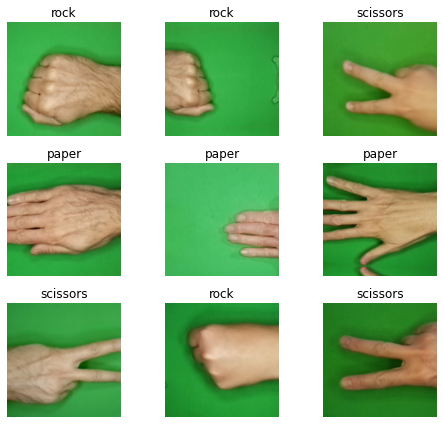

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate], model_dir='/tmp/models/')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


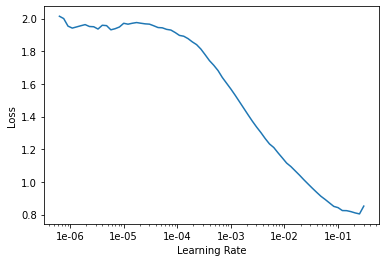

In [ ]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
lr = 1e-03
learner.fit_one_cycle(4, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.877346,0.034666,0.990826,0.009174,11:47
1,0.384642,0.018383,0.995413,0.004587,10:16
2,0.226806,0.028019,0.990826,0.009174,10:21
3,0.144981,0.024763,0.990826,0.009174,10:16


In [ ]:
learner.save('stage-1-frozen-resnet34')

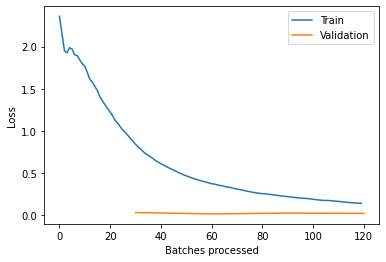

In [ ]:
learner.recorder.plot_losses()

In [ ]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


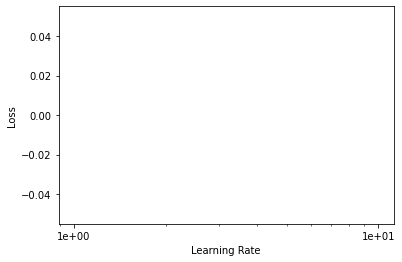

In [ ]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(4, max_lr=slice(1e-04))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.072490,0.016033,0.990826,0.009174,15:06
1,0.059226,0.015905,0.995413,0.004587,15:15
2,0.049655,0.011263,0.995413,0.004587,15:05
3,0.037711,0.009203,0.995413,0.004587,15:05


In [ ]:
learner.save('stage-2-unfrozen-resnet34')

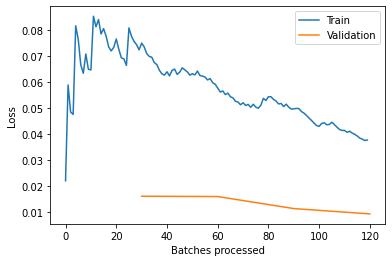

In [ ]:
learner.recorder.plot_losses()

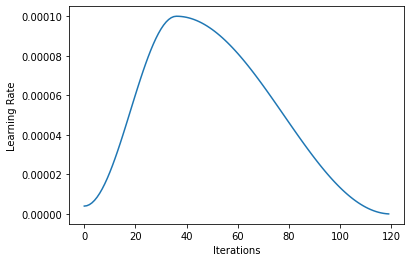

In [ ]:
learner.recorder.plot_lr()

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

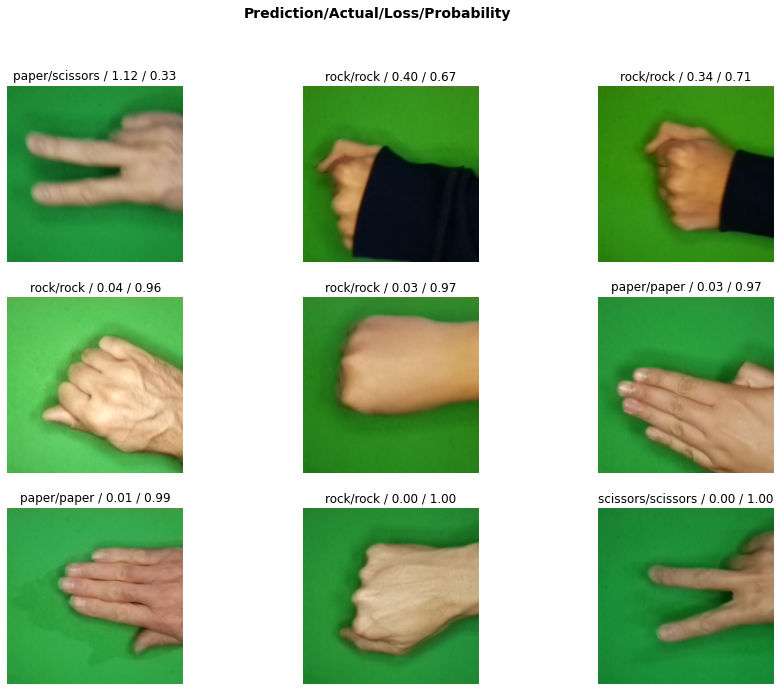

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: ignored

Saving 1jKhi65BPTLXnUI6.png to 1jKhi65BPTLXnUI6.png


NameError: ignored

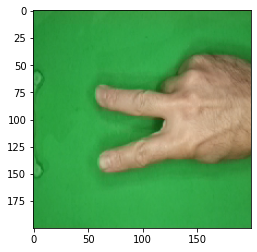

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  z = np.array(classes).tolist()
  
  print(fn)
  print(classes)
  if z==[[1.0, 0.0, 0.0]]:
    print('PAPER')
  elif z==[[0.0, 1.0, 0.0]]:
    print('ROCK')
  else:
    print('SCISSORS')